In [1]:
# 1) Load the dataset
import pandas as pd

telco_df = pd.read_csv('/content/Telco-Customer-Churn.csv')
print(telco_df.columns)
telco_df.head()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
#2. Cleaning, handling missing values, replace/drop missing values, columnlists, convert variables


# Removing missing values
telco_df.dropna(inplace=True)

# Remove customer IDs from the dataset (assuming 'customerID' is the first column)
telco_df = telco_df.iloc[:, 1:]

# Converting the 'Churn' predictor variable to binary numeric values
telco_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telco_df['Churn'].replace(to_replace='No', value=0, inplace=True)

# Convert all the categorical variables into dummy variables
telco_df_dummies = pd.get_dummies(telco_df)

# Display the first few rows of the DataFrame with dummy variables
telco_df_dummies.head()


,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


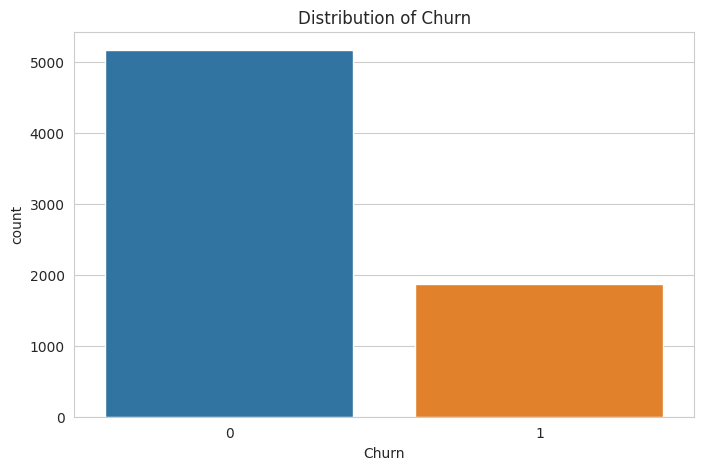

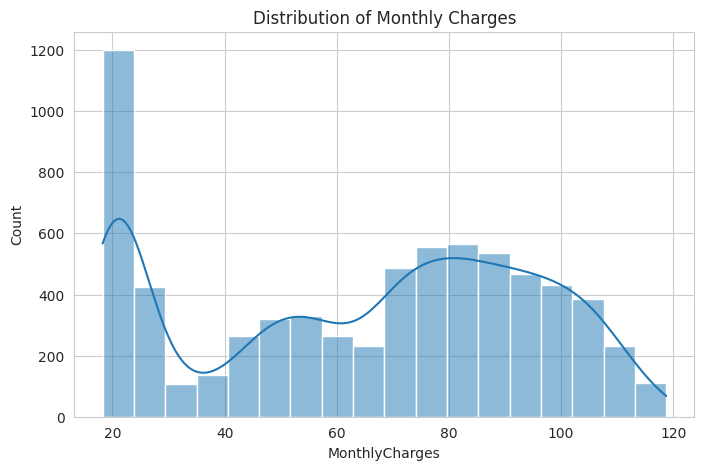

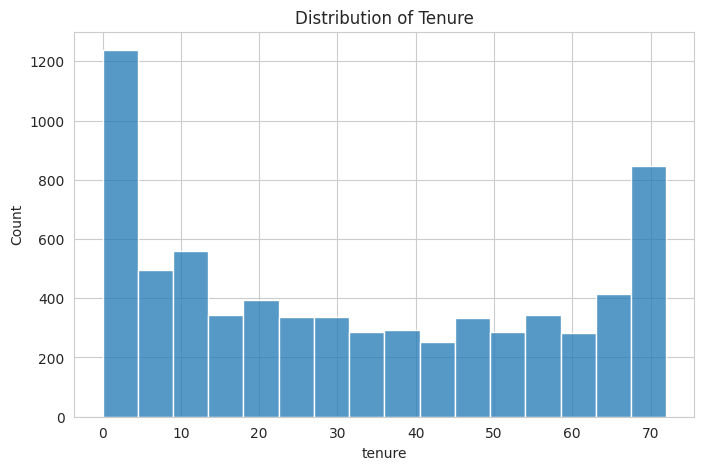

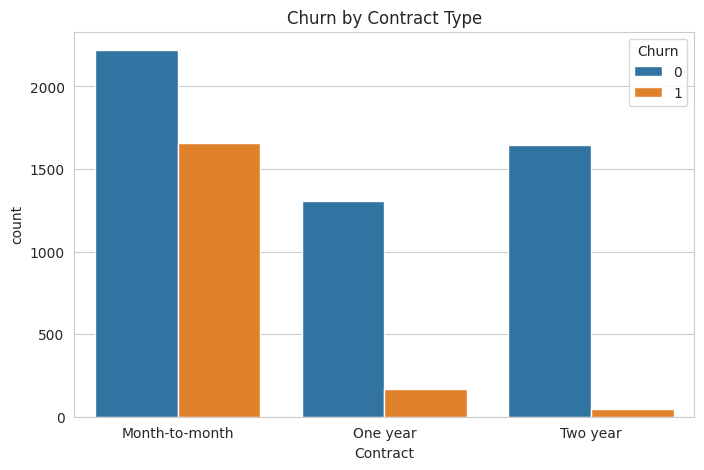

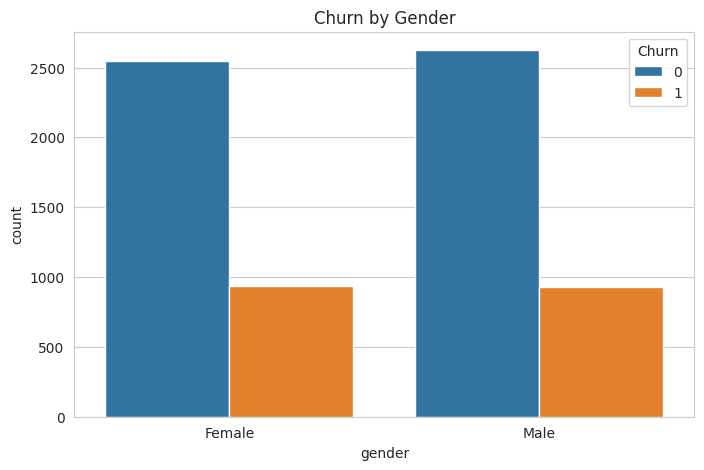

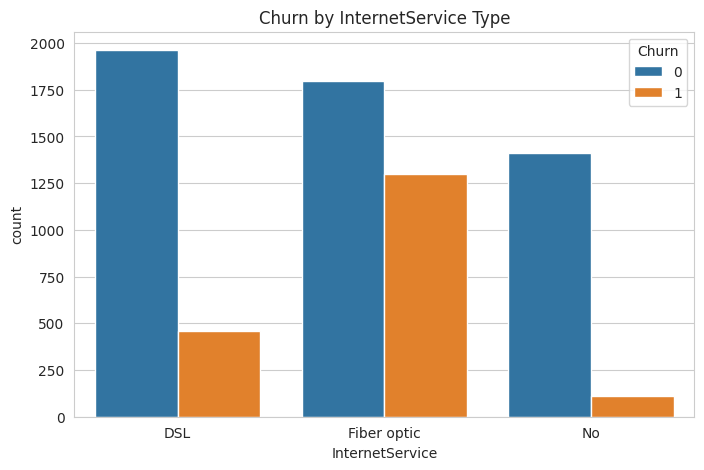

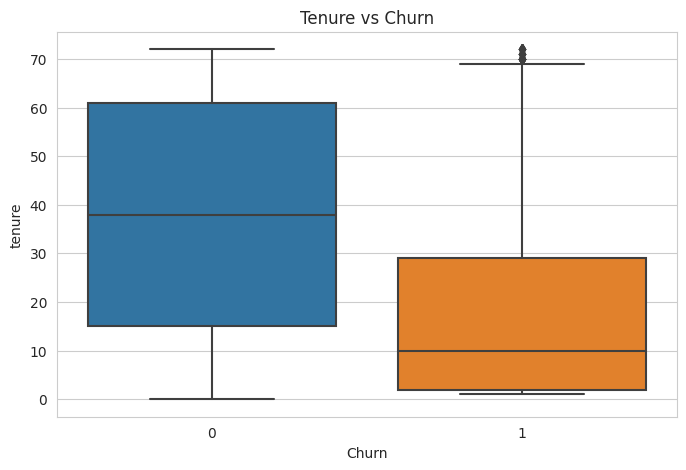

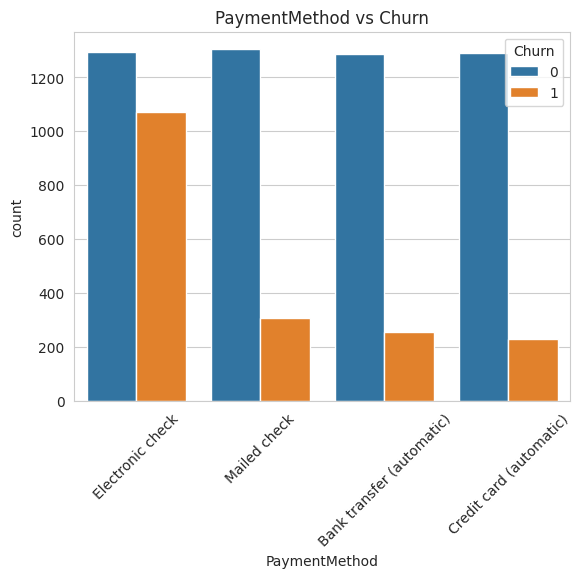

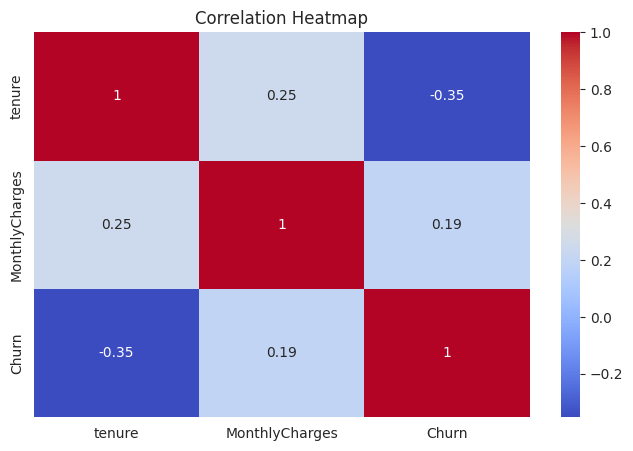

In [3]:
#3) Visualization of the data

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the aesthetics for Seaborn plots
sns.set_style("whitegrid")

# 1. Distribution of Churn
plt.figure(figsize=(8,5))
sns.countplot(data=telco_df, x='Churn')
plt.title('Distribution of Churn')
plt.show()

# 2.1 Distribution of MonthlyCharges
plt.figure(figsize=(8,5))
sns.histplot(data=telco_df, x='MonthlyCharges', kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

#2.2 Distribution of Tenure
plt.figure(figsize=(8,5))
sns.histplot(telco_df['tenure'])
plt.title('Distribution of Tenure')
plt.show()

# 3. Churn by Contract Type
plt.figure(figsize=(8,5))
sns.countplot(data=telco_df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

# 4. Churn by Gender
plt.figure(figsize=(8,5))
sns.countplot(data=telco_df, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

# 5. Churn by InternetService Type
plt.figure(figsize=(8,5))
sns.countplot(data=telco_df, x='InternetService', hue='Churn')
plt.title('Churn by InternetService Type')
plt.show()

# 6. Tenure vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=telco_df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()

# 7. Churn rates by PaymentMethod
sns.countplot(data=telco_df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title('PaymentMethod vs Churn')
plt.show()

# 8. Correlation Heatmap
correlations = telco_df[['tenure', 'MonthlyCharges', 'Churn']].corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


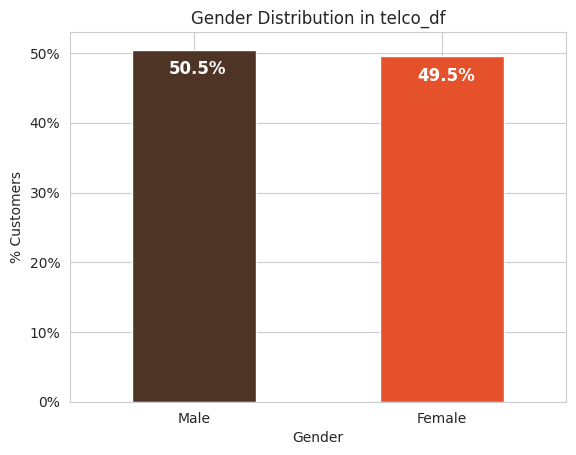

In [4]:
# 9. Gender Distribution

import matplotlib.ticker as mtick


colors = ['#4D3425','#E4512B']
ax = (telco_df['gender'].value_counts() * 100.0 / len(telco_df)).plot(kind='bar',
                                                                      stacked=True,
                                                                      rot=0,
                                                                      color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution in telco_df')

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_x() pulls left or right; get_height() pushes up or down
    ax.text(i.get_x() + .15, i.get_height() - 3.5,
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            weight='bold')



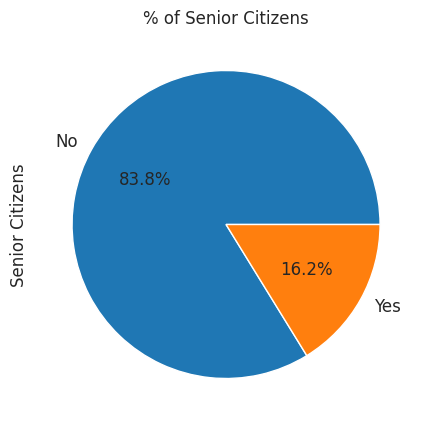

In [5]:
#10. Senior Citizen

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = (telco_df['SeniorCitizen'].value_counts()*100.0 /len(telco_df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'], figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('% of Senior Citizens', fontsize=12)

plt.show()


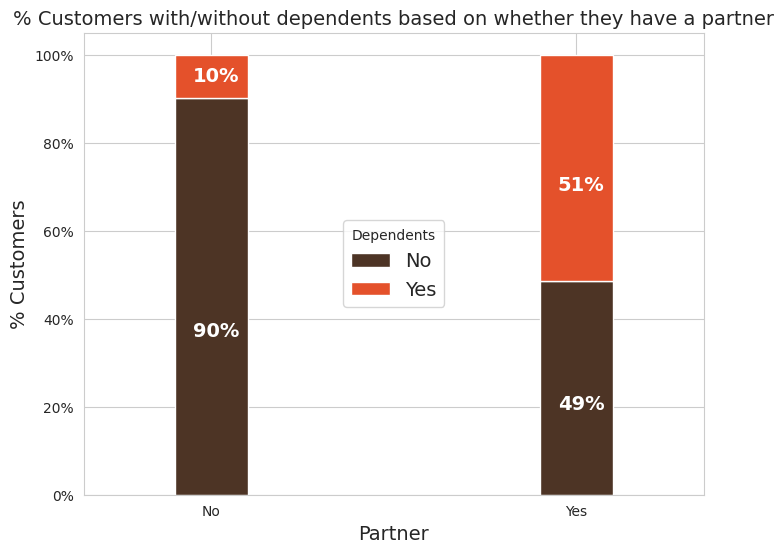

In [6]:
#11. Customers with/without dependents based on whether they have a partner

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ['#4D3425','#E4512B']
partner_dependents = telco_df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                      width = 0.2,
                                                                      stacked = True,
                                                                      rot = 0,
                                                                      figsize = (8,6),
                                                                      color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size':14}, title='Dependents', fontsize=14)
ax.set_ylabel('% Customers', size=14)
ax.set_title('% Customers with/without dependents based on whether they have a partner', size=14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color='white',
                weight='bold',
                size=14)

plt.show()


<ipython-input-7-12a43197f32a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telco_df[telco_df['Contract'] == 'Month-to-month']['tenure'],
<ipython-input-7-12a43197f32a>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telco_df[telco_df['Contract'] == 'One year']['tenure'],
<ipytho

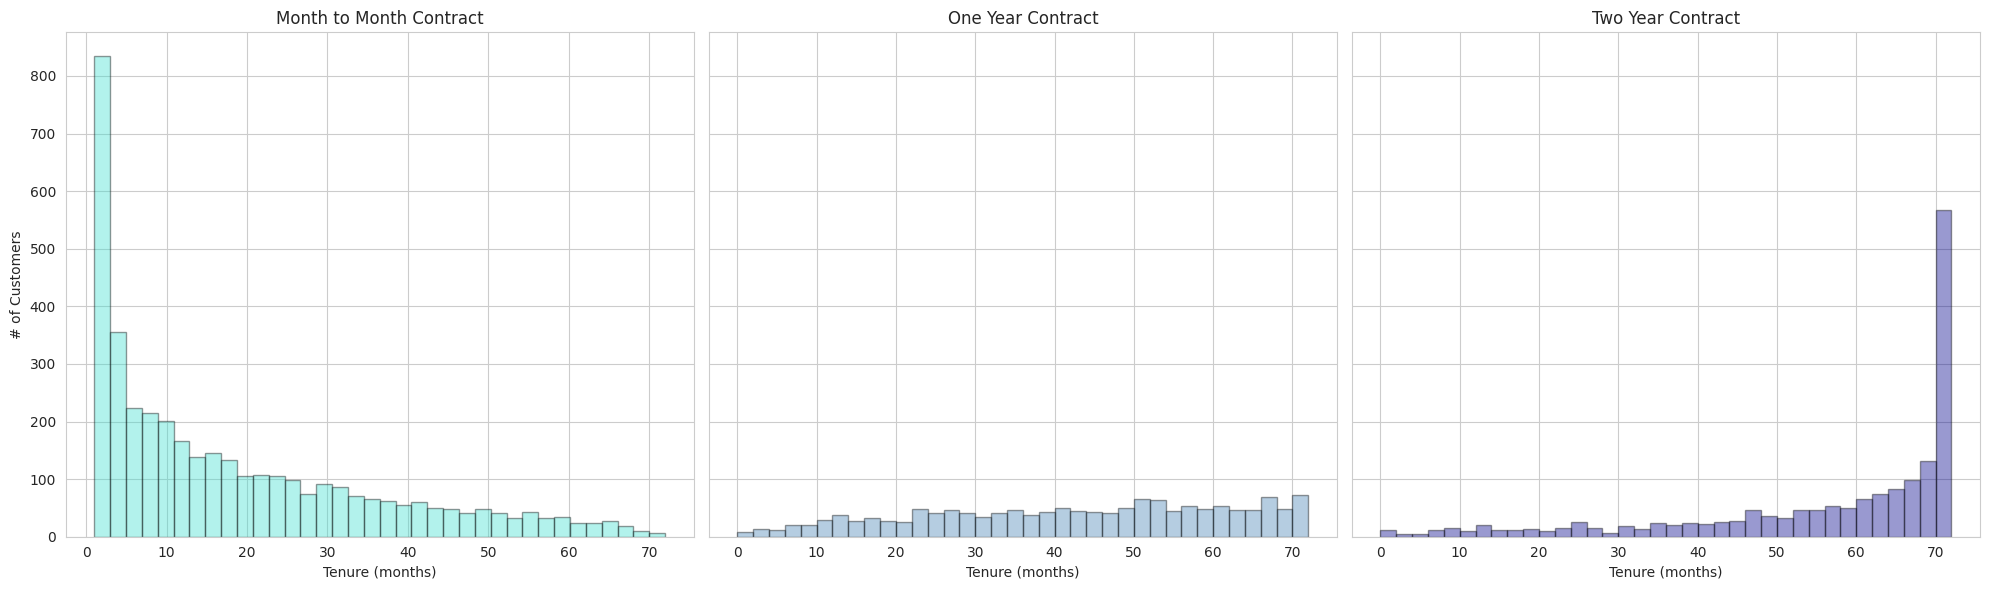

In [7]:
#12. Tenure vs Churn
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

ax = sns.distplot(telco_df[telco_df['Contract'] == 'Month-to-month']['tenure'],
                  hist=True, kde=False,
                  bins=int(180/5), color='turquoise',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telco_df[telco_df['Contract'] == 'One year']['tenure'],
                  hist=True, kde=False,
                  bins=int(180/5), color='steelblue',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax2)
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')

ax = sns.distplot(telco_df[telco_df['Contract'] == 'Two year']['tenure'],
                  hist=True, kde=False,
                  bins=int(180/5), color='darkblue',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

plt.tight_layout()
plt.show()


In [8]:
# 4. Modeling

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(y_true, y_pred, title):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt="d",
                cmap=plt.cm.Blues,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_score, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

[[938  98]
 [151 222]]
ROC-AUC Score: 0.86


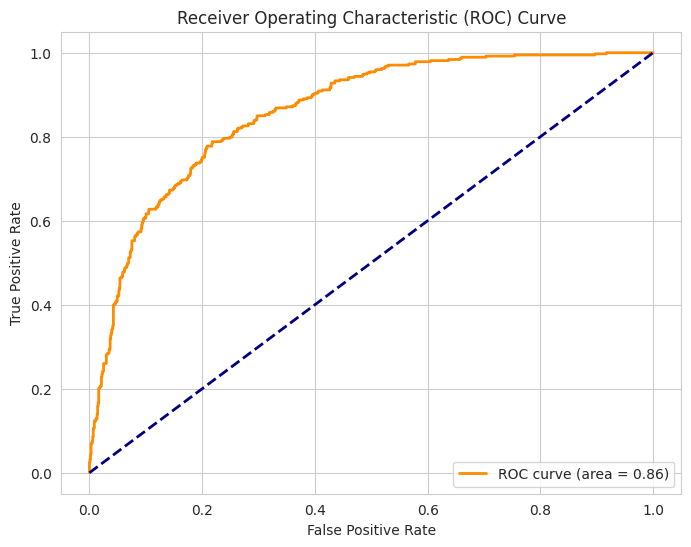

In [9]:
# 4.a) Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats


# Prepare the data
X = telco_df_dummies.drop('Churn', axis=1)  # Features
y = telco_df_dummies['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000) # increased max_iter for convergence
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
laccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {laccuracy:.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import roc_auc_score, roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob = logistic_model.predict_proba(X_test)[:,1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Accuracy: 0.78
Decision Trees:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.59      0.48      0.53       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



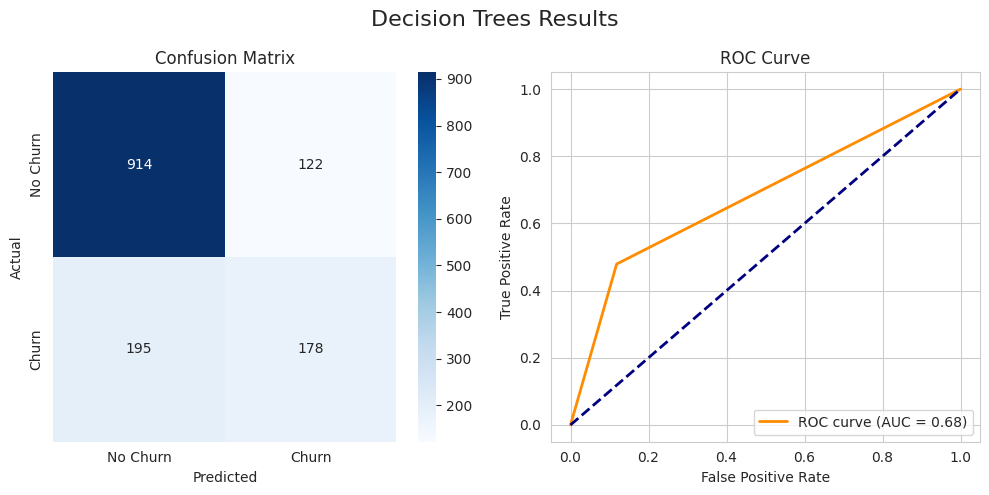

In [10]:
#Decision Tree, Confusion Matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import plot_tree


from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

daccuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {daccuracy:.2f}")

print("Decision Trees:")
print(classification_report(y_test, y_pred_tree))


def plot_cm(y_true, y_pred, y_prob, title="Confusion Matrix and ROC Curve"):
    # Plotting confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    # Overall title
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Using the function
plot_cm(y_test, y_pred_tree, y_prob_tree, "Decision Trees Results")


# Plotting the Decision Tree
#plt.figure(figsize=(20,10))
#plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=["No Churn", "Churn"], proportion=True)
#plt.title("Decision Tree")
#plt.show()


Accuracy: 0.79
Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



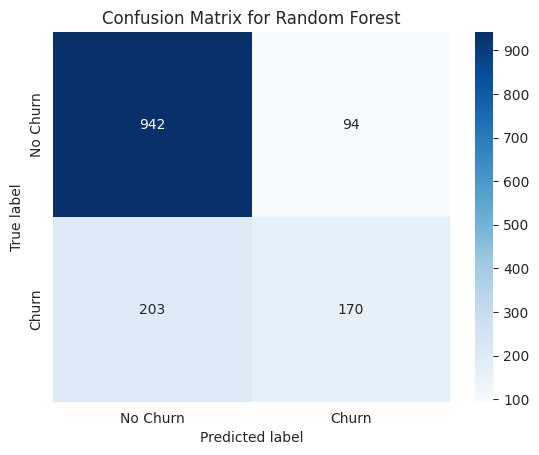

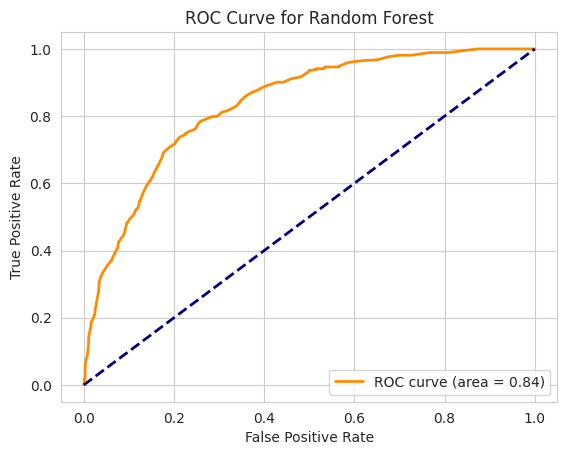

In [11]:
#4.e) Decision Forest
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

raccuracy = accuracy_score(y_test, y_pred_forest)
raccuracy = round(raccuracy, 2)
print(f"Accuracy: {raccuracy:.2f}")

print("Random Forest:")
print(classification_report(y_test, y_pred_forest))

#Random Forest
plot_confusion_matrix(y_test, y_pred_forest, "Confusion Matrix for Random Forest")
y_score_forest = forest_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_score_forest, "ROC Curve for Random Forest")


from sklearn.tree import plot_tree

# Choose one tree from the forest (e.g., the first tree)
#chosen_tree = forest_model.estimators_[0]

#plt.figure(figsize=(20,10))
#plot_tree(chosen_tree, filled=True, feature_names=X_train.columns, class_names=["No Churn", "Churn"], proportion=True)
#plt.title("A Tree from Random Forest")
#plt.show()


Accuracy: 0.78
KNN:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.59      0.52      0.55       373

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.78      0.77      1409



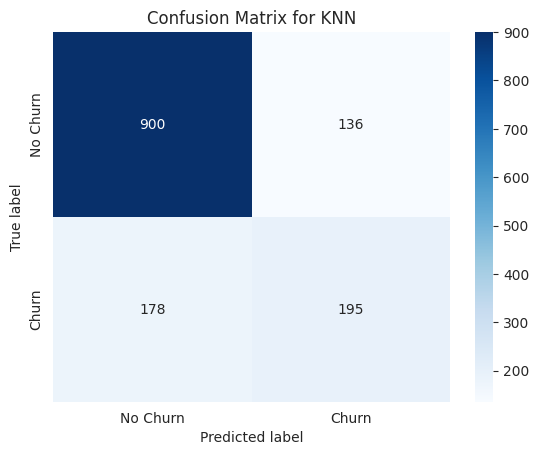

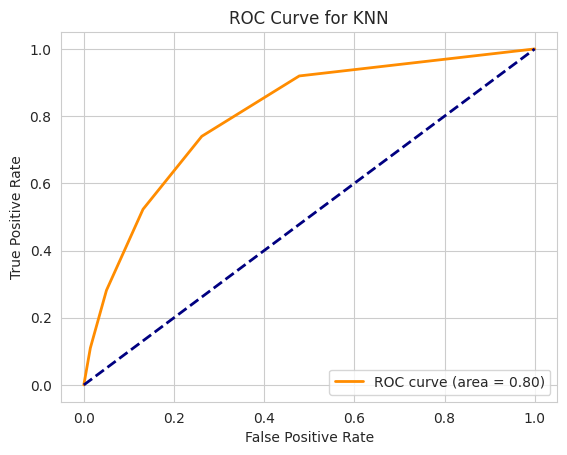

In [12]:
#4.f) KNN Model

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for this example
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

kaccuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {kaccuracy:.2f}")

print("KNN:")
print(classification_report(y_test, y_pred_knn))


# KNN
plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix for KNN")
y_score_knn = knn_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_score_knn, "ROC Curve for KNN")


Accuracy: 0.28
Naive Bayes:
              precision    recall  f1-score   support

           0       0.64      0.05      0.09      1036
           1       0.26      0.92      0.40       373

    accuracy                           0.28      1409
   macro avg       0.45      0.49      0.25      1409
weighted avg       0.54      0.28      0.17      1409



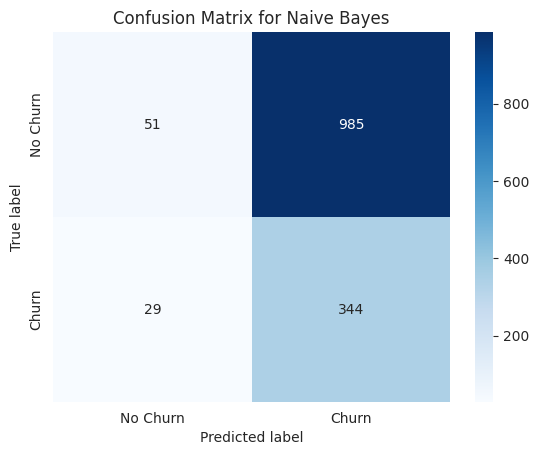

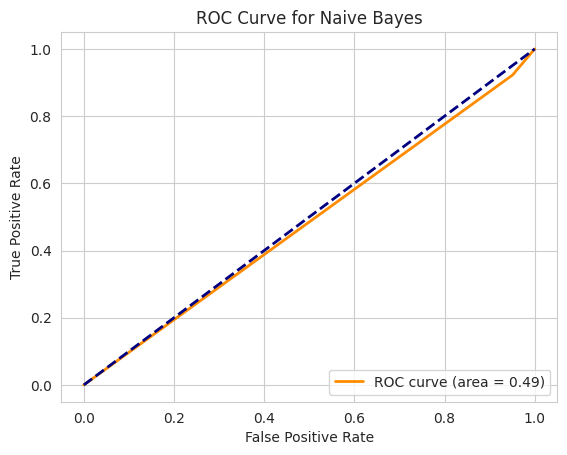

In [13]:
#4.g) Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

naccuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {naccuracy:.2f}")

print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

#Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, "Confusion Matrix for Naive Bayes")
y_score_nb = nb_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_score_nb, "ROC Curve for Naive Bayes")

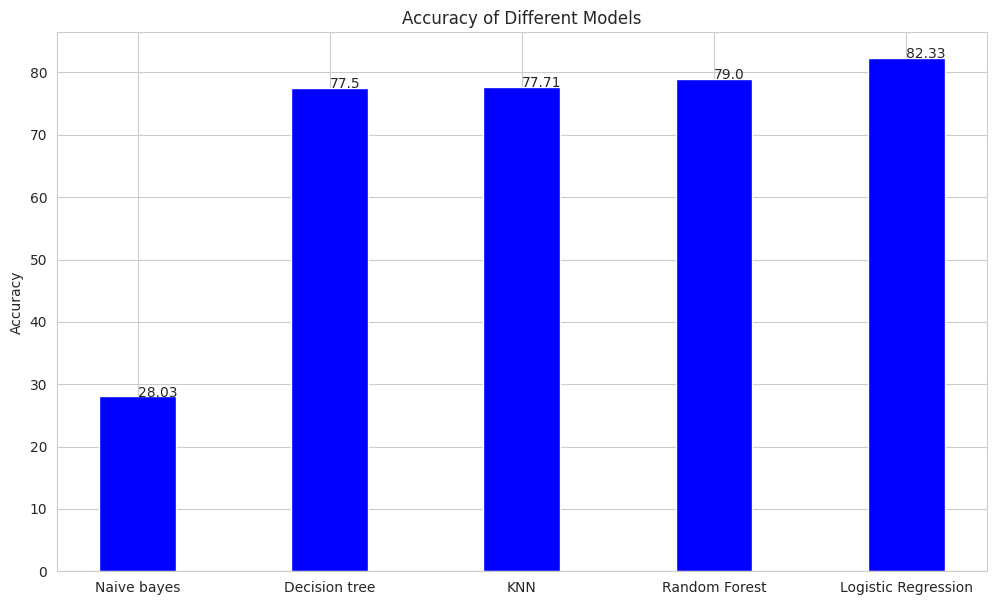

In [14]:
# 5. Comparison among the models

data = {'Naive bayes': naccuracy*100, 'Decision tree':daccuracy*100,
		'KNN':kaccuracy*100,'Random Forest':raccuracy*100, 'Logistic Regression':laccuracy*100}

models = list(data.keys())
accuracies = list(data.values())
accuracies.sort()

fig = plt.figure(figsize = (12, 7))

for i in range(len(models)):
        plt.text(i,round(accuracies[i],2),round(accuracies[i],2))

# creating the bar plot
plt.bar(models, accuracies, color ='blue',width = 0.4,)


plt.ylabel("Accuracy")

plt.title("Accuracy of Different Models")
plt.show()